In [36]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# Setting up a data type for manual backpropagation

class Value:

    def __init__(self, data, _childen=(), _op='', label=''):
        self.data = data
        self.grad = 0 # initialize gradient for all Values to 0
        self._prev = set(_childen)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self,other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self,other), '*')
        return out
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L
    

Value(data=-8.0)

In [38]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

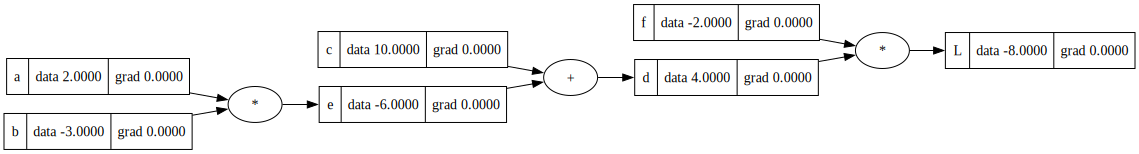

In [39]:
step1 = draw_dot(L)
step1

In [40]:
L.grad = 1.0 # It is a given that final output always has gradient 1

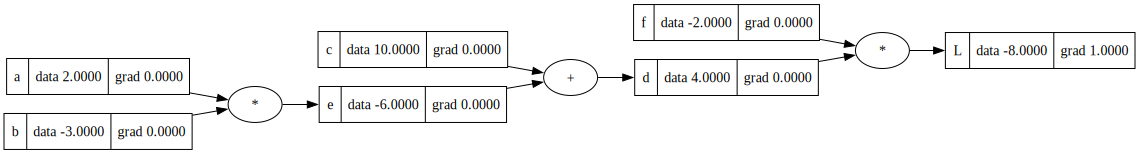

In [41]:
step2 = draw_dot(L)
step2

#### Now working backwards lets compute gradient of d and f

#### Gradient for h,

L = d * f

Therefore, dL / dd = f

proof : 

( f(x + h) - f(x) )/ h

if we are changing d by a small amount h

( (d+h)*f - d*f ) / h

( d*f + h*f - d*f ) / h

h*f/h

f


#### Similarly gradient for f, 

dL / df = d

In [42]:
d.grad = f.data
f.grad = d.data

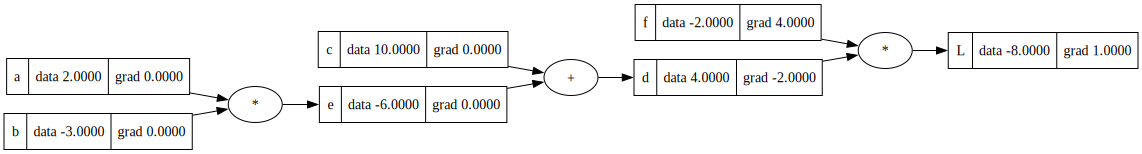

In [43]:
step3 = draw_dot(L)
step3

#### Compute gradients of c and e

dL / dc = dL/dd * dd/dc

d = c + e

dd/dc = d(c)/dc + d(e)/dc 

Therefore, dd/dc = 1.0

Proof:


( f(x + h) - f(x) )/ h

if we are changing c by a small amount h

( (c + h) + e - (c + e) ) / h

h / h

1.0

dL/dc = -2.0 * 1.0 = -2.0


#### Similarly gradient of e, 

dd/de = 1.0

dL/de = dL/dd * dd/de 

dL/de = -2.0 * 1.0 = -2.0

In [44]:
c.grad = -2.0
e.grad = -2.0

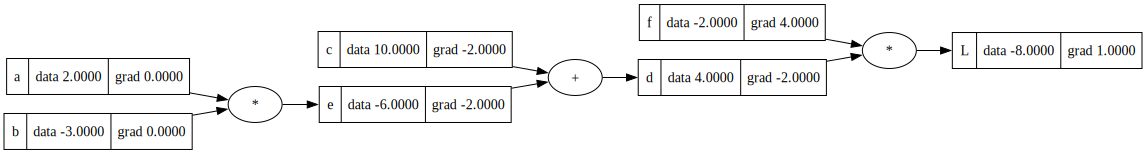

In [45]:
step4 = draw_dot(L)
step4

#### Compute gradients of a and b

Given : dL/de = -2.0


e = a * b

de/da = b
de/db = a

#### Gradient of a ,
dL/da = de/da * dL/de

dL/da = -3.0 * -2.0 = 6.0

#### Gradient of b ,
dL/db = de/db * dL/de

dL/db = 2.0 * -2.0 = -4.0

In [46]:
a.grad = 6.0
b.grad = -4.0

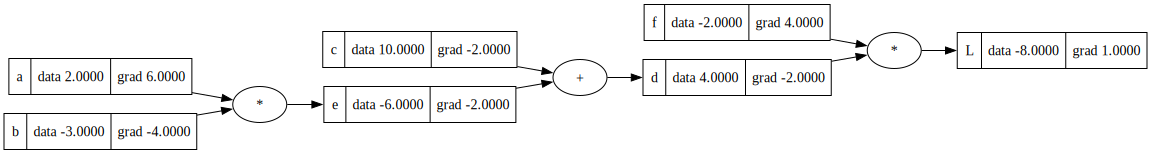

In [47]:
step5 = draw_dot(L)
step5

In [ ]:
# Preview of a single optimization step

# Taking 0.01 as the learning rate 

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = c + e

L = d * f

print(L)

Value(data=-7.286496)


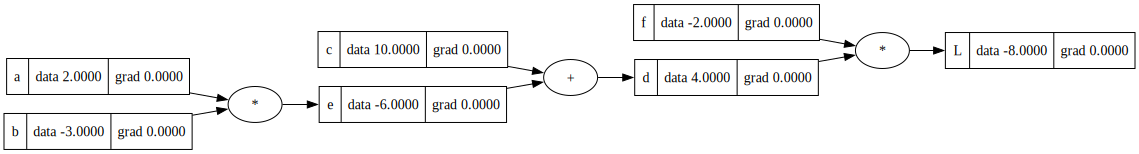

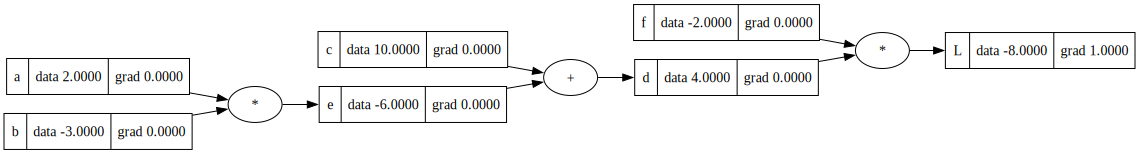

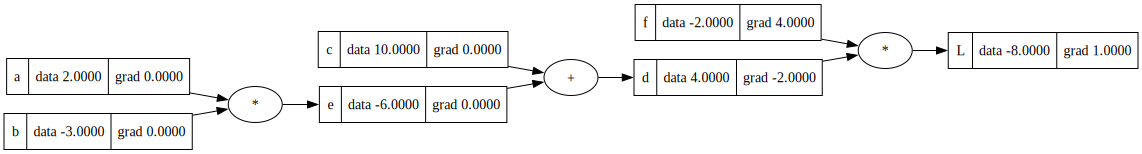

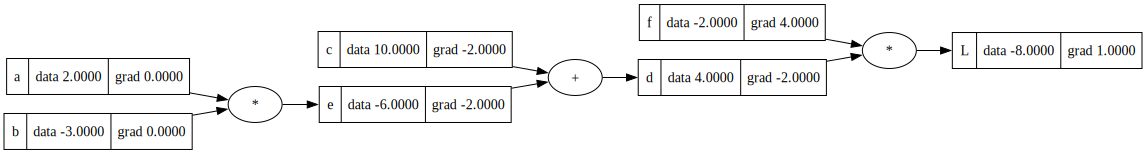

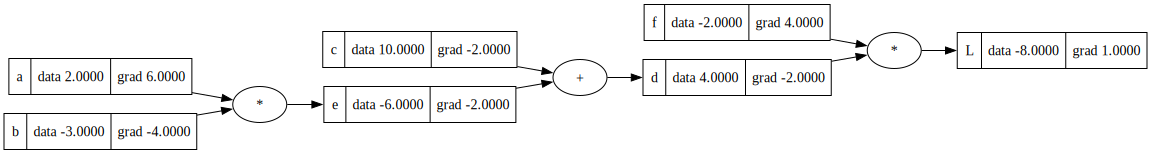

In [49]:
from IPython.display import display

display(step1)
display(step2)
display(step3)
display(step4)
display(step5)
